In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Dict, Tuple, Optional

import sys
import os
sys.path.append(os.path.abspath(".."))
from src.qst.models.DNN import DNNQST
from src.qst.models.mle import MLEQST
from src.qst.models.bayes import BayesQST
from scipy.linalg import sqrtm
from typing import Any

import tensorflow as tf

In [2]:

# Purity Dataset
data_2p_10 = np.load('../src/qst/datasets/2_qubit_shots/2q_purity_10.npz', allow_pickle=True)
data_2p_20 = np.load('../src/qst/datasets/2_qubit_shots/2q_purity_20.npz', allow_pickle=True)
data_2p_50 = np.load('../src/qst/datasets/2_qubit_shots/2q_purity_50.npz', allow_pickle=True)
data_2p_100 = np.load('../src/qst/datasets/2_qubit_shots/2q_purity_100.npz', allow_pickle=True)
data_2p_1000 = np.load('../src/qst/datasets/2_qubit_shots/2q_purity_1000.npz', allow_pickle=True)
data_2p_10_000 = np.load('../src/qst/datasets/2_qubit_shots/2q_purity_10000.npz', allow_pickle=True)

X_2p_10 = data_2p_10['counts']; y_2p_10 = data_2p_10['states']
X_2p_20 = data_2p_20['counts']; y_2p_20 = data_2p_20['states']
X_2p_50 = data_2p_50['counts']; y_2p_50 = data_2p_50['states']
X_2p_100 = data_2p_100['counts']; y_2p_100 = data_2p_100['states']
X_2p_1000 = data_2p_1000['counts']; y_2p_1000 = data_2p_1000['states']
X_2p_10_000 = data_2p_10_000['counts']; y_2p_10_000 = data_2p_10_000['states']

data_3p_10 = np.load('../src/qst/datasets/3_qubit_shots/3q_purity_10.npz', allow_pickle=True)
data_3p_20 = np.load('../src/qst/datasets/3_qubit_shots/3q_purity_20.npz', allow_pickle=True)
data_3p_50 = np.load('../src/qst/datasets/3_qubit_shots/3q_purity_50.npz', allow_pickle=True)
data_3p_100 = np.load('../src/qst/datasets/3_qubit_shots/3q_purity_100.npz', allow_pickle=True)
data_3p_1000 = np.load('../src/qst/datasets/3_qubit_shots/3q_purity_1000.npz', allow_pickle=True)
data_3p_10_000 = np.load('../src/qst/datasets/3_qubit_shots/3q_purity_10000.npz', allow_pickle=True)

X_3p_10 = data_3p_10['counts']; y_3p_10 = data_3p_10['states']
X_3p_20 = data_3p_20['counts']; y_3p_20 = data_3p_20['states']
X_3p_50 = data_3p_50['counts']; y_3p_50 = data_3p_50['states']
X_3p_100 = data_3p_100['counts']; y_3p_100 = data_3p_100['states']
X_3p_1000 = data_3p_1000['counts']; y_3p_1000 = data_3p_1000['states']
X_3p_10_000 = data_3p_10_000['counts']; y_3p_10_000 = data_3p_10_000['states']

In [10]:
# first train the models
def make_base_model(input_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(input_dim,)),
        tf.keras.layers.Dense(512, use_bias=False),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation("relu"),
        tf.keras.layers.Dropout(0.2),

        tf.keras.layers.Dense(512, use_bias=False),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation("relu"),
        tf.keras.layers.Dropout(0.2),

        tf.keras.layers.Dense(16)
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss="mse")
    return model

dnn_2q_10 = DNNQST(d=4, model=make_base_model(X_2p_10.shape[1]))
dnn_2q_20 = DNNQST(d=4, model=make_base_model(X_2p_20.shape[1]))
dnn_2q_50 = DNNQST(d=4, model=make_base_model(X_2p_50.shape[1]))
dnn_2q_100 = DNNQST(d=4, model=make_base_model(X_2p_100.shape[1]))
dnn_2q_1000 = DNNQST(d=4, model=make_base_model(X_2p_1000.shape[1]))
dnn_2q_10_000 = DNNQST(d=4, model=make_base_model(X_2p_10_000.shape[1]))

dnn_2q_10.fit(X_2p_10, y_2p_10)
dnn_2q_20.fit(X_2p_20, y_2p_20)
dnn_2q_50.fit(X_2p_50, y_2p_50)
dnn_2q_100.fit(X_2p_100, y_2p_100)
dnn_2q_1000.fit(X_2p_1000, y_2p_1000)
dnn_2q_10_000.fit(X_2p_10_000, y_2p_10_000)


Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.1542 - val_loss: 0.0202
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0119 - val_loss: 0.0182
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0114 - val_loss: 0.0167
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0107 - val_loss: 0.0172
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0100 - val_loss: 0.0186
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0097 - val_loss: 0.0176
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0096 - val_loss: 0.0176
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0096 - val_loss: 0.0170
Epoch 9/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0095 - val_loss: 0.0162
Epoch 10/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0095 - val_loss: 0.0173
Epoch 11/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0094 - val_loss: 0.0168
Epoch 12/20
1407/1407 ━━━━━━━━

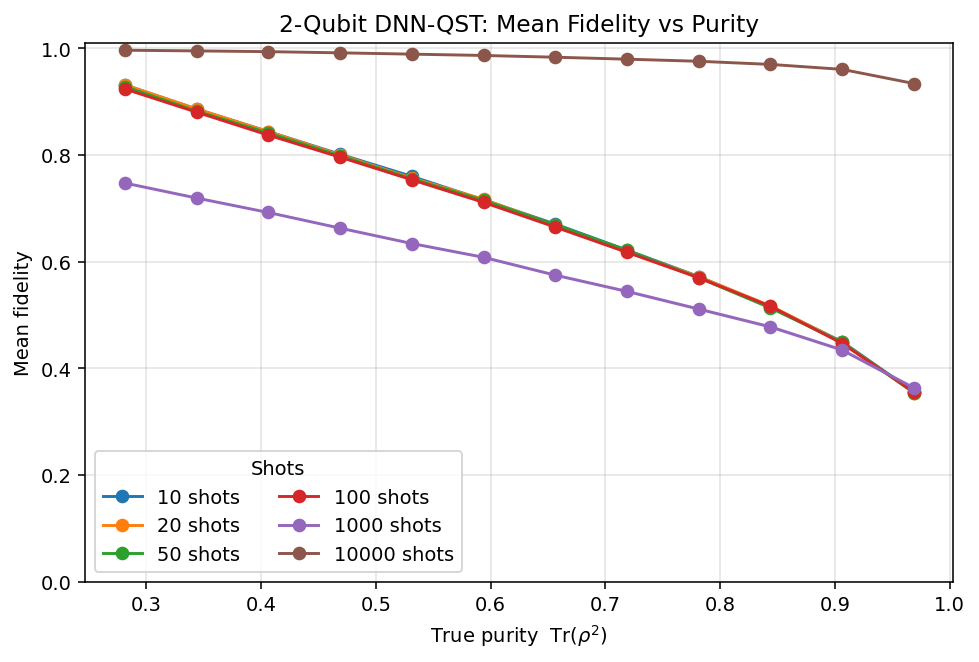

In [ ]:
def purity_of_rho_batch(rhos: np.ndarray) -> np.ndarray:
    """
    rhos: (N, d, d) complex or real density matrices
    returns: (N,) purities Tr(rho^2)
    """
    # robust to complex dtype
    r2 = rhos @ rhos
    pur = np.real(np.trace(r2, axis1=1, axis2=2))
    return pur

def make_purity_bins(d: int, n_bins: int = 12, purity_bins: Optional[list[tuple[float, float]]] = None):
    """
    If purity_bins is provided, use it as explicit bins [(low, high), ...].
    Else make uniform bins from 1/d to 1.
    Returns bin_edges, bin_centers
    """
    if purity_bins is not None:
        edges = np.array([b[0] for b in purity_bins] + [purity_bins[-1][1]], dtype=float)
        centers = np.array([(a+b)/2 for (a, b) in purity_bins], dtype=float)
        return edges, centers, purity_bins

    Pmin, Pmax = 1.0/d, 1.0
    edges = np.linspace(Pmin, Pmax, n_bins+1)
    centers = 0.5 * (edges[:-1] + edges[1:])
    bins_list = [(float(edges[i]), float(edges[i+1])) for i in range(n_bins)]
    return edges, centers, bins_list

def aggregate_by_purity_bins(purities: np.ndarray,
                             fidelities: np.ndarray,
                             bin_edges: np.ndarray):
    """
    Returns mean, std, count per bin (NaN where empty)
    """
    n_bins = len(bin_edges) - 1
    mean = np.full(n_bins, np.nan, dtype=float)
    std  = np.full(n_bins, np.nan, dtype=float)
    cnt  = np.zeros(n_bins, dtype=int)

    which_bin = np.digitize(purities, bin_edges) - 1
    which_bin = np.where(which_bin == n_bins, n_bins-1, which_bin)

    for b in range(n_bins):
        idx = (which_bin == b) & (purities >= bin_edges[b]) & (purities <= bin_edges[b+1])
        if np.any(idx):
            vals = fidelities[idx]
            mean[b] = float(np.mean(vals))
            std[b]  = float(np.std(vals, ddof=0))
            cnt[b]  = int(np.sum(idx))
    return mean, std, cnt


def plot_mean_fidelity_by_purity(
    dnn: "DNNQST",
    datasets: Dict[int, Tuple[np.ndarray, np.ndarray]],
    n_bins: int = 12,
    purity_bins: Optional[list[tuple[float, float]]] = None,
    batch_size: int = 256,
    max_eval_per_shots: Optional[int] = None,
    rng_seed: int = 0,
    title: Optional[str] = None,
):
    """
    For each shots entry, compute per-example fidelity, bin by TRUE purity Tr(rho^2),
    and plot mean ± SEM across bins. Returns (fig, ax, results_dict).
    """
    # deduce dimension d from a sample Y
    any_Y = next(iter(datasets.values()))[1]
    d = any_Y.shape[1]

    rng = np.random.default_rng(rng_seed)
    bin_edges, bin_centers, bins_list = make_purity_bins(d, n_bins=n_bins, purity_bins=purity_bins)

    # compute & plot
    fig, ax = plt.subplots(figsize=(8, 5), dpi=140)
    results = {} 

    shots_sorted = sorted(datasets.keys())
    for shots in shots_sorted:
        X, Y_rho_true = datasets[shots]
        N = Y_rho_true.shape[0]

        if (max_eval_per_shots is not None) and (N > max_eval_per_shots):
            idx = rng.choice(N, size=max_eval_per_shots, replace=False)
            X = X[idx]
            Y_rho_true = Y_rho_true[idx]

        _, _, fids = dnn.evaluate_fidelity(X, Y_rho_true, batch_size=batch_size)
        pur = purity_of_rho_batch(Y_rho_true)

        mean, std, cnt = aggregate_by_purity_bins(pur, fids, bin_edges)

        with np.errstate(invalid="ignore", divide="ignore"):
            sem = std / np.sqrt(np.maximum(cnt, 1))

        mask = ~np.isnan(mean)
        ax.plot(bin_centers[mask], mean[mask], marker="o", linewidth=1.5, label=f"{shots} shots")
        ax.fill_between(bin_centers[mask], (mean-sem)[mask], (mean+sem)[mask], alpha=0.2)

        results[shots] = {
            "bin_centers": bin_centers,
            "bin_edges": bin_edges,
            "bins": bins_list,
            "mean": mean,
            "std": std,
            "sem": sem,
            "count": cnt,
        }

    ax.set_xlabel("True purity  Tr($\\rho^2$)")
    ax.set_ylabel("Mean fidelity")
    ax.set_ylim(0.0, 1.01)
    ax.grid(True, alpha=0.35)
    if title is None:
        title = "DNN-QST: Mean fidelity vs purity (by shot count)"
    ax.set_title(title)
    ax.legend(title="Shots", ncols=2 if len(datasets) > 5 else 1, frameon=True)

    return fig, ax, results


shots_list = [10, 20, 50, 100, 1000, 10_000]

datasets_2q = {
    10: (X_2p_10, y_2p_10),
    20: (X_2p_20, y_2p_20),
    50: (X_2p_50, y_2p_50),
    100: (X_2p_100, y_2p_100),
    1000: (X_2p_1000, y_2p_1000),
    10_000: (X_2p_10_000, y_2p_10_000),
}

datasets_3q = {
    10: (X_3p_10, y_3p_10),
    20: (X_3p_20, y_3p_20),
    50: (X_3p_50, y_3p_50),
    100: (X_3p_100, y_3p_100),
    1000: (X_3p_1000, y_3p_1000),
    10_000: (X_3p_10_000, y_3p_10_000),
}


fig, ax, results = plot_mean_fidelity_by_purity(
    dnn=dnn_2q,
    datasets=datasets_2q,
    n_bins=12,
    max_eval_per_shots=20000,
    title="2-Qubit DNN-QST: Mean Fidelity vs Purity"
)
plt.show()

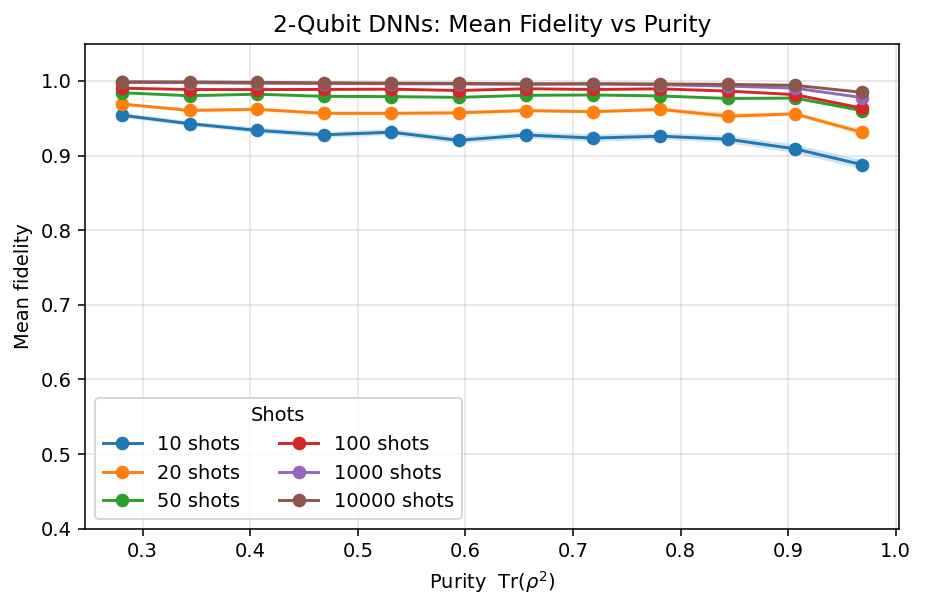

In [ ]:
def plot_mean_fidelity_by_purity_multi(
    dnns_by_shots: dict[int, "DNNQST"],
    datasets: dict[int, tuple[np.ndarray, np.ndarray]],
    n_bins: int = 12,
    purity_bins: list[tuple[float, float]] | None = None,
    batch_size: int = 256,
    max_eval_per_shots: int | None = None,
    rng_seed: int = 0,
    title: str | None = None,
):
    any_Y = next(iter(datasets.values()))[1]
    d = any_Y.shape[1]

    rng = np.random.default_rng(rng_seed)
    bin_edges, bin_centers, bins_list = make_purity_bins(d, n_bins=n_bins, purity_bins=purity_bins)

    fig, ax = plt.subplots(figsize=(7.5, 4.5), dpi=140)
    results = {}

    for shots in sorted(datasets.keys()):
        if shots not in dnns_by_shots:
            continue

        dnn = dnns_by_shots[shots]
        X, Y = datasets[shots]
        N = Y.shape[0]
        if (max_eval_per_shots is not None) and (N > max_eval_per_shots):
            idx = rng.choice(N, size=max_eval_per_shots, replace=False)
            X, Y = X[idx], Y[idx]

        _, _, fids = dnn.evaluate_fidelity(X, Y, batch_size=batch_size)
        pur = purity_of_rho_batch(Y)

        mean, std, cnt = aggregate_by_purity_bins(pur, fids, bin_edges)
        sem = np.divide(std, np.sqrt(np.maximum(cnt, 1)), out=np.full_like(std, np.nan), where=cnt>0)

        mask = ~np.isnan(mean)
        ax.plot(bin_centers[mask], mean[mask], marker="o", linewidth=1.5, label=f"{shots} shots")
        ax.fill_between(bin_centers[mask], (mean-sem)[mask], (mean+sem)[mask], alpha=0.2)

        results[shots] = dict(bin_centers=bin_centers, bin_edges=bin_edges, bins=bins_list,
                              mean=mean, std=std, sem=sem, count=cnt)

    ax.set_xlabel("Purity  Tr($\\rho^2$)")
    ax.set_ylabel("Mean fidelity")
    ax.set_ylim(0.4, 1.05)
    ax.grid(True, alpha=0.35)
    ax.legend(title="Shots", ncols=2 if len(datasets) > 5 else 1, frameon=True)
    ax.set_title(title or "DNN-QST (per-shots models): Mean fidelity vs purity")
    return fig, ax, results

dnns_2q = {
    10: dnn_2q_10,
    20: dnn_2q_20,
    50: dnn_2q_50,
    100: dnn_2q_100,
    1000: dnn_2q_1000,
    10_000: dnn_2q_10_000,
}

data_test_2p_10 = np.load('../src/qst/datasets/test_purities/2q_purity_10.npz', allow_pickle=True)
data_test_2p_20 = np.load('../src/qst/datasets/test_purities/2q_purity_20.npz', allow_pickle=True)
data_test_2p_50 = np.load('../src/qst/datasets/test_purities/2q_purity_50.npz', allow_pickle=True)
data_test_2p_100 = np.load('../src/qst/datasets/test_purities/2q_purity_100.npz', allow_pickle=True)
data_test_2p_1000 = np.load('../src/qst/datasets/test_purities/2q_purity_1000.npz', allow_pickle=True)
data_test_2p_10_000 = np.load('../src/qst/datasets/test_purities/2q_purity_10_000.npz', allow_pickle=True)

X_test_2p_10 = data_test_2p_10['counts']; y_test_2p_10 = data_test_2p_10['states']
X_test_2p_20 = data_test_2p_20['counts']; y_test_2p_20 = data_test_2p_20['states']
X_test_2p_50 = data_test_2p_50['counts']; y_test_2p_50 = data_test_2p_50['states']
X_test_2p_100 = data_test_2p_100['counts']; y_test_2p_100 = data_test_2p_100['states']
X_test_2p_1000 = data_test_2p_1000['counts']; y_test_2p_1000 = data_test_2p_1000['states']
X_test_2p_10_000 = data_test_2p_10_000['counts']; y_test_2p_10_000 = data_test_2p_10_000['states']

datasets_2q_test = {
    10: (X_test_2p_10, y_test_2p_10),
    20: (X_test_2p_20, y_test_2p_20),
    50: (X_test_2p_50, y_test_2p_50),
    100: (X_test_2p_100, y_test_2p_100),
    1000: (X_test_2p_1000, y_test_2p_1000),
    10_000: (X_test_2p_10_000, y_test_2p_10_000),
}

fig, ax, res = plot_mean_fidelity_by_purity_multi(
    dnns_by_shots=dnns_2q,
    datasets=datasets_2q_test,
    n_bins=12,
    max_eval_per_shots=20000,
    title="2-Qubit DNNs: Mean Fidelity vs Purity"
)
plt.show()

In [18]:
X_3p_10.shape[1]

216

In [20]:
# first train the models
def make_base_model_3q(input_dim):

    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(input_dim,)),
        tf.keras.layers.Dense(512, use_bias=False),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation("relu"),
        tf.keras.layers.Dropout(0.2),

        tf.keras.layers.Dense(512, use_bias=False),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation("relu"),
        tf.keras.layers.Dropout(0.2),

        tf.keras.layers.Dense(512, use_bias=False),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation("relu"),
        tf.keras.layers.Dropout(0.2),

        tf.keras.layers.Dense(64)
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss="mse")
    return model

dnn_3q_10 = DNNQST(d=8, model=make_base_model_3q(X_3p_10.shape[1]))
dnn_3q_20 = DNNQST(d=8, model=make_base_model_3q(X_3p_20.shape[1]))
dnn_3q_50 = DNNQST(d=8, model=make_base_model_3q(X_3p_50.shape[1]))
dnn_3q_100 = DNNQST(d=8, model=make_base_model_3q(X_3p_100.shape[1]))
dnn_3q_1000 = DNNQST(d=8, model=make_base_model_3q(X_3p_1000.shape[1]))
dnn_3q_10_000 = DNNQST(d=8, model=make_base_model_3q(X_3p_10_000.shape[1]))

dnn_3q_10.fit(X_3p_10, y_3p_10)
dnn_3q_20.fit(X_3p_20, y_3p_20)
dnn_3q_50.fit(X_3p_50, y_3p_50)
dnn_3q_100.fit(X_3p_100, y_3p_100)
dnn_3q_1000.fit(X_3p_1000, y_3p_1000)
dnn_3q_10_000.fit(X_3p_10_000, y_3p_10_000)

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.1490 - val_loss: 0.0122
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0067 - val_loss: 0.0096
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0056 - val_loss: 0.0075
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0049 - val_loss: 0.0067
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0044 - val_loss: 0.0061
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0040 - val_loss: 0.0058
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0038 - val_loss: 0.0050
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0036 - val_loss: 0.0052
Epoch 9/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0035 - val_loss: 0.0047
Epoch 10/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0034 - val_loss: 0.0046
Epoch 11/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0033 - val_loss: 0.0046
Epoch 12/20
1407/1407 ━━━━━━

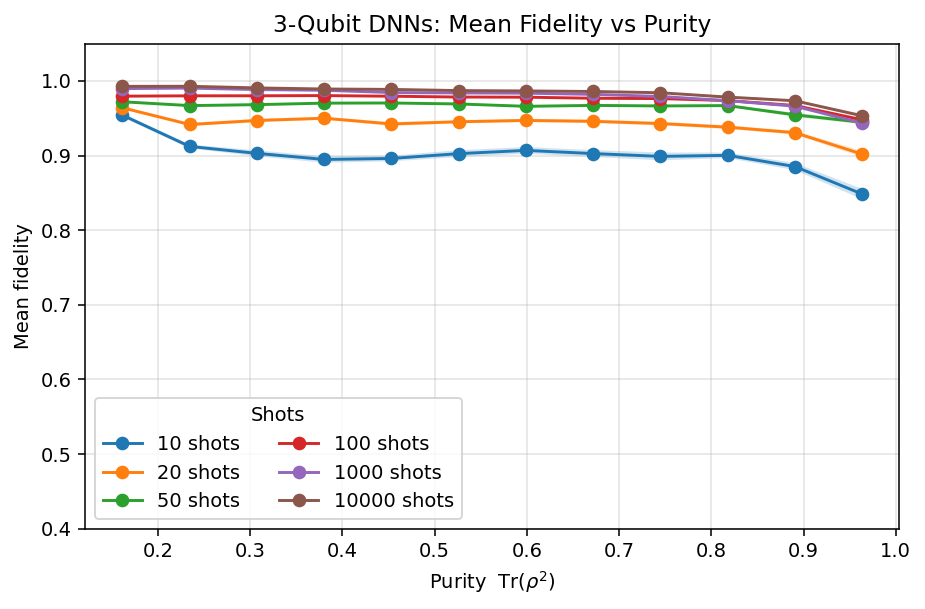

In [21]:
dnns_3q = {
    10: dnn_3q_10,
    20: dnn_3q_20,
    50: dnn_3q_50,
    100: dnn_3q_100,
    1000: dnn_3q_1000,
    10_000: dnn_3q_10_000,
}

data_test_3p_10 = np.load('../src/qst/datasets/test_purities/3q_purity_10.npz', allow_pickle=True)
data_test_3p_20 = np.load('../src/qst/datasets/test_purities/3q_purity_20.npz', allow_pickle=True)
data_test_3p_50 = np.load('../src/qst/datasets/test_purities/3q_purity_50.npz', allow_pickle=True)
data_test_3p_100 = np.load('../src/qst/datasets/test_purities/3q_purity_100.npz', allow_pickle=True)
data_test_3p_1000 = np.load('../src/qst/datasets/test_purities/3q_purity_1000.npz', allow_pickle=True)
data_test_3p_10_000 = np.load('../src/qst/datasets/test_purities/3q_purity_10000.npz', allow_pickle=True)

X_test_3p_10 = data_test_3p_10['counts']; y_test_3p_10 = data_test_3p_10['states']
X_test_3p_20 = data_test_3p_20['counts']; y_test_3p_20 = data_test_3p_20['states']
X_test_3p_50 = data_test_3p_50['counts']; y_test_3p_50 = data_test_3p_50['states']
X_test_3p_100 = data_test_3p_100['counts']; y_test_3p_100 = data_test_3p_100['states']
X_test_3p_1000 = data_test_3p_1000['counts']; y_test_3p_1000 = data_test_3p_1000['states']
X_test_3p_10_000 = data_test_3p_10_000['counts']; y_test_3p_10_000 = data_test_3p_10_000['states']

datasets_3q_test = {
    10: (X_test_3p_10, y_test_3p_10),
    20: (X_test_3p_20, y_test_3p_20),
    50: (X_test_3p_50, y_test_3p_50),
    100: (X_test_3p_100, y_test_3p_100),
    1000: (X_test_3p_1000, y_test_3p_1000),
    10_000: (X_test_3p_10_000, y_test_3p_10_000),
}

fig, ax, res = plot_mean_fidelity_by_purity_multi(
    dnns_by_shots=dnns_3q,
    datasets=datasets_3q_test,
    n_bins=12,
    max_eval_per_shots=20000,
    title="3-Qubit DNNs: Mean Fidelity vs Purity"
)
plt.show()

In [44]:
data_2p_01 = np.load('../src/qst/datasets/Noise_purities/2q_noise_purity_0.01.npz', allow_pickle=True)
data_2p_02 = np.load('../src/qst/datasets/Noise_purities/2q_noise_purity_0.02.npz', allow_pickle=True)
data_2p_05 = np.load('../src/qst/datasets/Noise_purities/2q_noise_purity_0.05.npz', allow_pickle=True)
data_2p_10 = np.load('../src/qst/datasets/Noise_purities/2q_noise_purity_0.10.npz', allow_pickle=True)
data_2p_15 = np.load('../src/qst/datasets/Noise_purities/2q_noise_purity_0.15.npz', allow_pickle=True)
data_2p_20 = np.load('../src/qst/datasets/Noise_purities/2q_noise_purity_0.20.npz', allow_pickle=True)

X_2p_01 = data_2p_01['counts']; y_2p_01 = data_2p_01['states']
X_2p_02 = data_2p_02['counts']; y_2p_02 = data_2p_02['states']
X_2p_05 = data_2p_05['counts']; y_2p_05 = data_2p_05['states']
X_2p_10 = data_2p_10['counts']; y_2p_10 = data_2p_10['states']
X_2p_15 = data_2p_15['counts']; y_2p_15 = data_2p_15['states']
X_2p_20 = data_2p_20['counts']; y_2p_20 = data_2p_20['states']


data_3p_01 = np.load('../src/qst/datasets/Noise_purities/3q_noise_purity_0.01.npz', allow_pickle=True)
data_3p_02 = np.load('../src/qst/datasets/Noise_purities/3q_noise_purity_0.02.npz', allow_pickle=True)
data_3p_05 = np.load('../src/qst/datasets/Noise_purities/3q_noise_purity_0.05.npz', allow_pickle=True)
data_3p_10 = np.load('../src/qst/datasets/Noise_purities/3q_noise_purity_0.10.npz', allow_pickle=True)
data_3p_15 = np.load('../src/qst/datasets/Noise_purities/3q_noise_purity_0.15.npz', allow_pickle=True)
data_3p_20 = np.load('../src/qst/datasets/Noise_purities/3q_noise_purity_0.20.npz', allow_pickle=True)

X_3p_01 = data_3p_01['counts']; y_3p_01 = data_3p_01['states']
X_3p_02 = data_3p_02['counts']; y_3p_02 = data_3p_02['states']
X_3p_05 = data_3p_05['counts']; y_3p_05 = data_3p_05['states']
X_3p_10 = data_3p_10['counts']; y_3p_10 = data_3p_10['states']
X_3p_15 = data_3p_15['counts']; y_3p_15 = data_3p_15['states']
X_3p_20 = data_3p_20['counts']; y_3p_20 = data_3p_20['states']

In [ ]:
def compute_purity(rhos: np.ndarray) -> np.ndarray:
    """Compute Tr(rho^2) for an array of density matrices."""
    return np.real(np.einsum("nij,nji->n", rhos, rhos))

def fidelity(rho1, rho2):
    sqrt_rho1 = sqrtm(rho1)
    F = np.trace(sqrtm(sqrt_rho1 @ rho2 @ sqrt_rho1))
    return np.real(F)**2

def evaluate_fidelity_vs_purity(
    datasets: Dict[float, Tuple[np.ndarray, np.ndarray]],
    methods: Dict[str, Any],
    n_bins: int = 8,
    sample_size: int = 1000,
    random_state: int = 42,
) -> Dict[str, Dict[float, Tuple[np.ndarray, np.ndarray, np.ndarray]]]:
    """
    Evaluate fidelity as a function of purity for each xi and method, 
    using only a subset (sample_size) of the total dataset.

    Returns:
        results[method][xi] = (purity_bin_centers, mean_fid_per_bin, std_fid_per_bin)
    """
    rng = np.random.default_rng(random_state)
    results = {}

    for method_name, model in methods.items():
        results[method_name] = {}
        print(f"\nEvaluating {method_name}...")

        for xi, (counts, rho_true) in datasets.items():
            N_total = len(rho_true)
            if sample_size is not None and sample_size < N_total:
                idx = rng.choice(N_total, size=sample_size, replace=False)
                counts = counts[idx]
                rho_true = rho_true[idx]
                print(f"  xi={xi:.3f}: sampled {sample_size} / {N_total} states")
            else:
                print(f"  xi={xi:.3f}: using all {N_total} states")

            purities = np.real(np.einsum("nij,nji->n", rho_true, rho_true))

            # Run reconstruction & fidelity evaluation
            if method_name == "MLE":
                _, _, fids = model.avg_fidelity(counts, rho_true)
            elif method_name == "BME":
                fids = np.zeros(len(counts))
                for i in range(len(counts)):
                    samples, _ = model.metropolis_sampler(counts[i])
                    rho_samples = np.array([model.params_to_rho(s) for s in samples])
                    rho_mean = rho_samples.mean(axis=0)
                    fids[i] = fidelity(rho_mean, rho_true[i])
            elif method_name == "DNN":
                _, _, fids = model.evaluate_fidelity(counts, rho_true)
            else:
                raise ValueError(f"Unknown method {method_name}")

            # Bin fidelities by purity
            bins = np.linspace(purities.min(), purities.max(), n_bins + 1)
            bin_centers = 0.5 * (bins[1:] + bins[:-1])
            mean_fid_per_bin = np.zeros(n_bins)
            std_fid_per_bin = np.zeros(n_bins)

            for j in range(n_bins):
                mask = (purities >= bins[j]) & (purities < bins[j + 1])
                if np.any(mask):
                    mean_fid_per_bin[j] = fids[mask].mean()
                    std_fid_per_bin[j] = fids[mask].std(ddof=0)
                else:
                    mean_fid_per_bin[j] = np.nan
                    std_fid_per_bin[j] = np.nan

            results[method_name][xi] = (bin_centers, mean_fid_per_bin, std_fid_per_bin)

    return results










Evaluating MLE...
  xi=0.010: sampled 1000 / 100000 states
  xi=0.020: sampled 1000 / 100000 states
  xi=0.050: sampled 1000 / 100000 states
  xi=0.100: sampled 1000 / 100000 states
  xi=0.150: sampled 1000 / 100000 states
  xi=0.200: sampled 1000 / 100000 states

Evaluating BME...
  xi=0.010: sampled 1000 / 100000 states
  xi=0.020: sampled 1000 / 100000 states
  xi=0.050: sampled 1000 / 100000 states
  xi=0.100: sampled 1000 / 100000 states
  xi=0.150: sampled 1000 / 100000 states
  xi=0.200: sampled 1000 / 100000 states

Evaluating DNN...
  xi=0.010: sampled 1000 / 100000 states
  xi=0.020: sampled 1000 / 100000 states
  xi=0.050: sampled 1000 / 100000 states
  xi=0.100: sampled 1000 / 100000 states
  xi=0.150: sampled 1000 / 100000 states
  xi=0.200: sampled 1000 / 100000 states


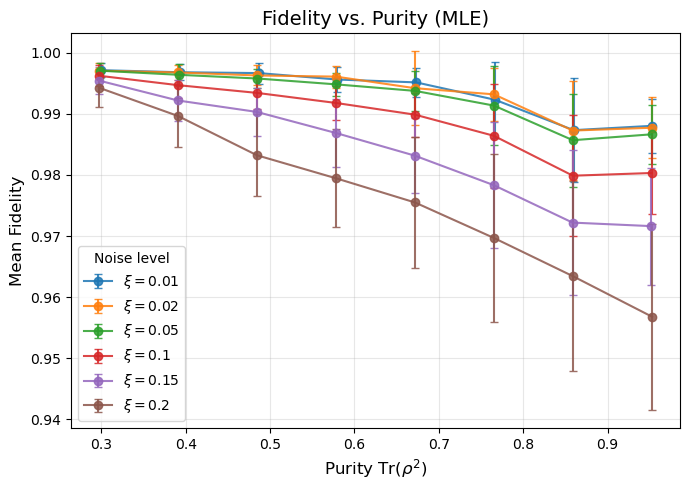

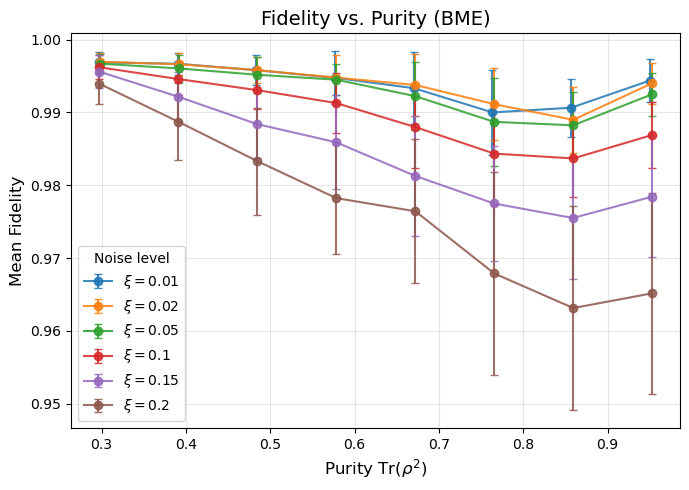

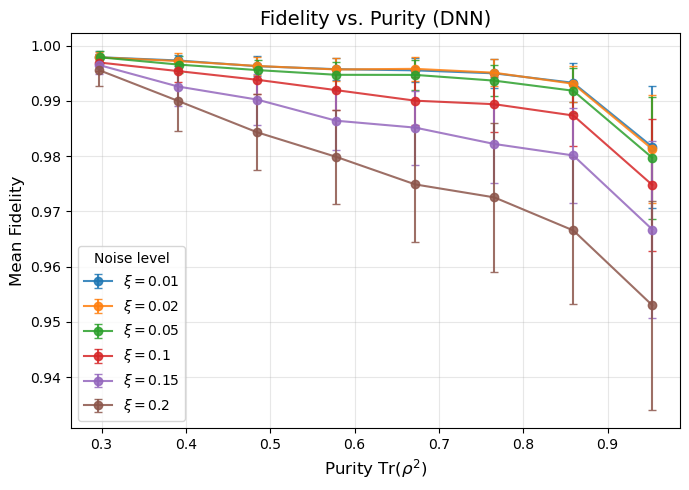

In [36]:
# Example setup
xis = [0.0, 0.01, 0.02, 0.05, 0.1, 0.15, 0.2]

datasets_2q_noise = {
    0.01: (X_2p_01, y_2p_01),
    0.02: (X_2p_02, y_2p_02),
    0.05: (X_2p_05, y_2p_05),
    0.10: (X_2p_10, y_2p_10),
    0.15: (X_2p_15, y_2p_15),
    0.20: (X_2p_20, y_2p_20)
}

# Instantiate models
mle_2q = MLEQST(n_qubits=2)
bme_2q = BayesQST(n_qubits=2)
dnn_2q = dnn_2q_1000

methods = {"MLE": mle_2q, "BME": bme_2q, "DNN": dnn_2q}

results = evaluate_fidelity_vs_purity(datasets_2q_noise, methods)
plot_results(results)

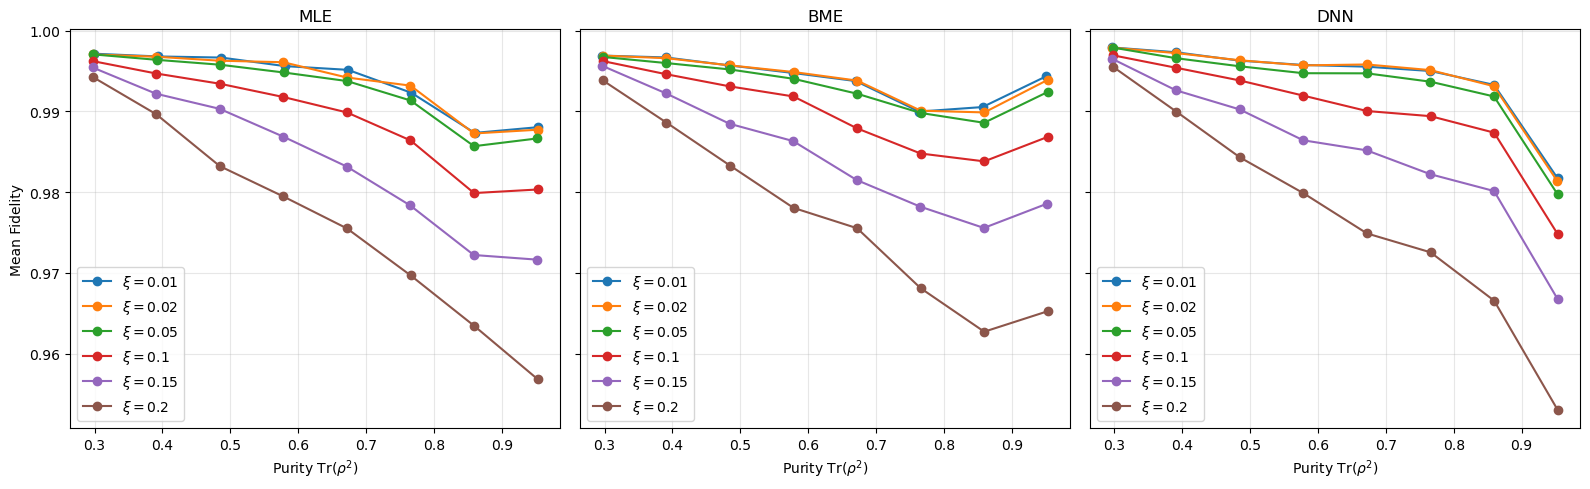

In [33]:
def plot_results(results: Dict[str, Dict[float, Tuple[np.ndarray, np.ndarray]]]):
    fig, axes = plt.subplots(1, 3, figsize=(16, 5), sharey=True)
    for ax, method in zip(axes, results.keys()):
        for xi, (purity_bins, fids) in results[method].items():
            ax.plot(purity_bins, fids, marker='o', label=rf"$\xi={xi}$")
        ax.set_title(method)
        ax.set_xlabel(r"Purity Tr($\rho^2$)")
        ax.grid(True, alpha=0.3)
        ax.legend()
    axes[0].set_ylabel("Mean Fidelity")
    plt.tight_layout()
    plt.show()

plot_results(results)

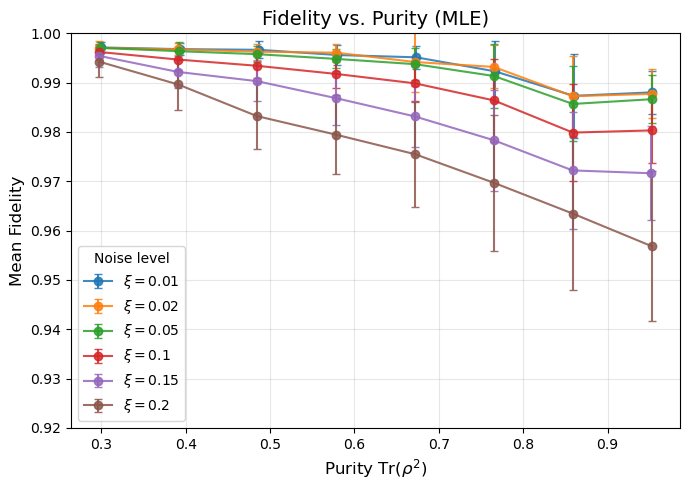

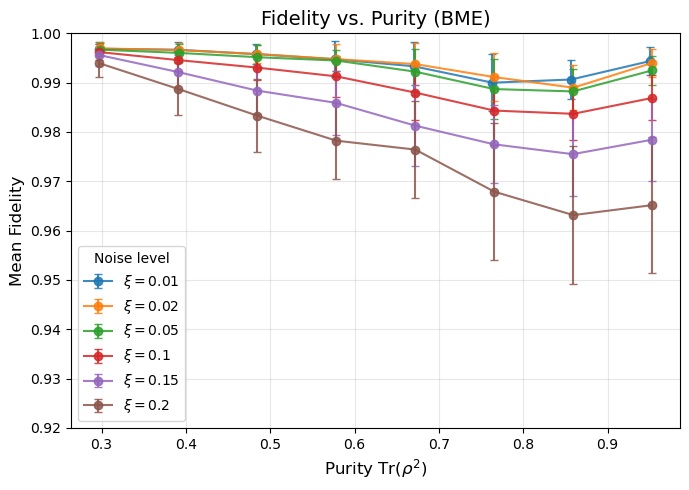

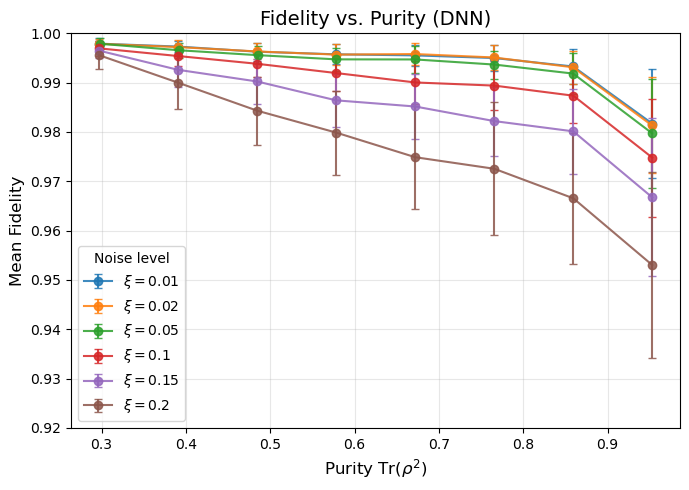

In [39]:
def plot_results(results: Dict[str, Dict[float, Tuple[np.ndarray, np.ndarray, np.ndarray]]]):
    """
    Plot each method's fidelity vs. purity as its own figure.
    Includes error bars for standard deviation within each purity bin.
    """
    for method, xi_dict in results.items():
        plt.figure(figsize=(7, 5))
        for xi, (purity_bins, mean_fids, std_fids) in xi_dict.items():
            plt.errorbar(
                purity_bins,
                mean_fids,
                yerr=std_fids,
                fmt='o-',
                capsize=3,
                label=f"$\\xi = {xi}$",
                alpha=0.85
            )
        plt.title(f"Fidelity vs. Purity ({method})", fontsize=14)
        plt.xlabel("Purity $\\mathrm{Tr}(\\rho^2)$", fontsize=12)
        plt.ylabel("Mean Fidelity", fontsize=12)
        plt.ylim(0.92, 1)
        plt.legend(title="Noise level")
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

plot_results(results)


Evaluating MLE...
  xi=0.010: sampled 1000 / 100000 states
  xi=0.020: sampled 1000 / 100000 states
  xi=0.050: sampled 1000 / 100000 states
  xi=0.100: sampled 1000 / 100000 states
  xi=0.150: sampled 1000 / 100000 states
  xi=0.200: sampled 1000 / 100000 states

Evaluating BME...
  xi=0.010: sampled 1000 / 100000 states


/Users/stevenglass/Desktop/Project Final/Honours-Project/src/qst/models/bayes.py:193: RuntimeWarning: overflow encountered in exp
  r = np.exp(prop_post - curr_post)


  xi=0.020: sampled 1000 / 100000 states
  xi=0.050: sampled 1000 / 100000 states
  xi=0.100: sampled 1000 / 100000 states
  xi=0.150: sampled 1000 / 100000 states
  xi=0.200: sampled 1000 / 100000 states

Evaluating DNN...
  xi=0.010: sampled 1000 / 100000 states
  xi=0.020: sampled 1000 / 100000 states
  xi=0.050: sampled 1000 / 100000 states
  xi=0.100: sampled 1000 / 100000 states
  xi=0.150: sampled 1000 / 100000 states
  xi=0.200: sampled 1000 / 100000 states


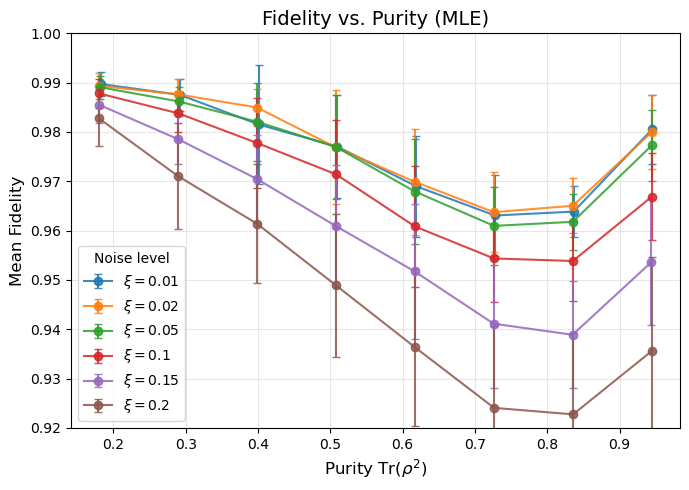

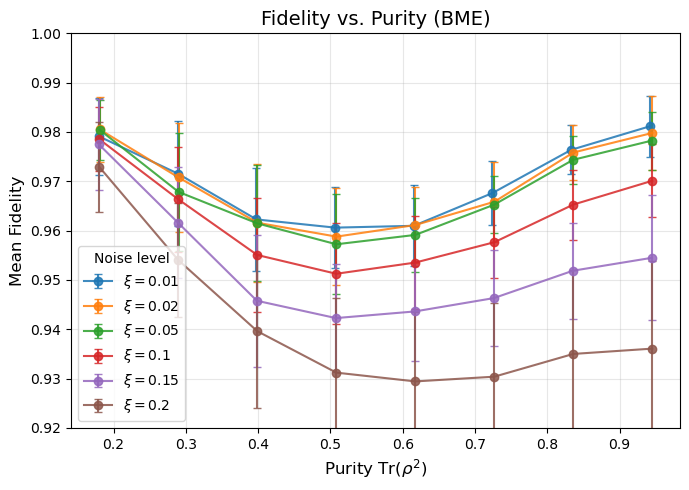

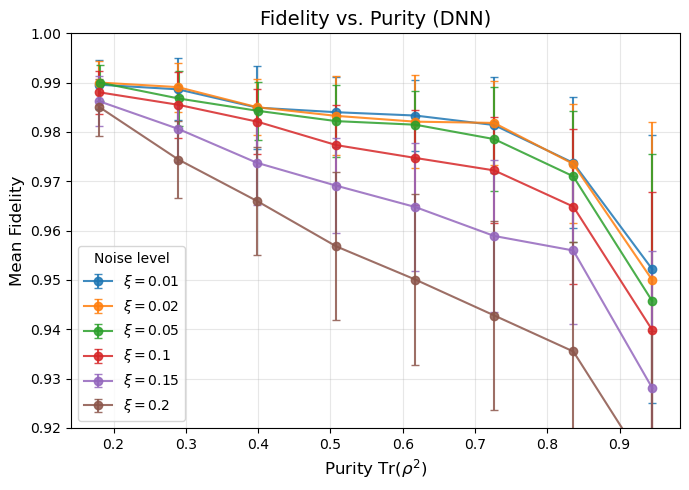

In [ ]:
xis = [0.0, 0.01, 0.02, 0.05, 0.1, 0.15, 0.2]

datasets_3q_noise = {
    0.01: (X_3p_01, y_3p_01),
    0.02: (X_3p_02, y_3p_02),
    0.05: (X_3p_05, y_3p_05),
    0.10: (X_3p_10, y_3p_10),
    0.15: (X_3p_15, y_3p_15),
    0.20: (X_3p_20, y_3p_20)
}

# Instantiate models
mle_3q = MLEQST(n_qubits=3)
bme_3q = BayesQST(n_qubits=3)
dnn_3q = dnn_3q_1000

methods_3q = {"MLE": mle_3q, "BME": bme_3q, "DNN": dnn_3q}

results_3q = evaluate_fidelity_vs_purity(datasets_3q_noise, methods_3q)


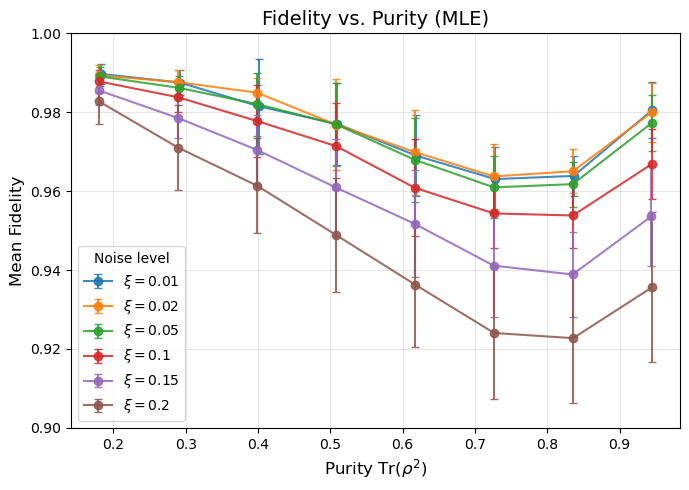

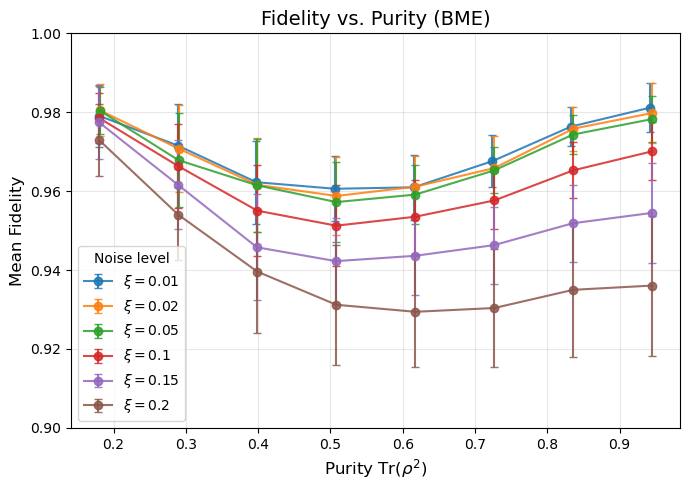

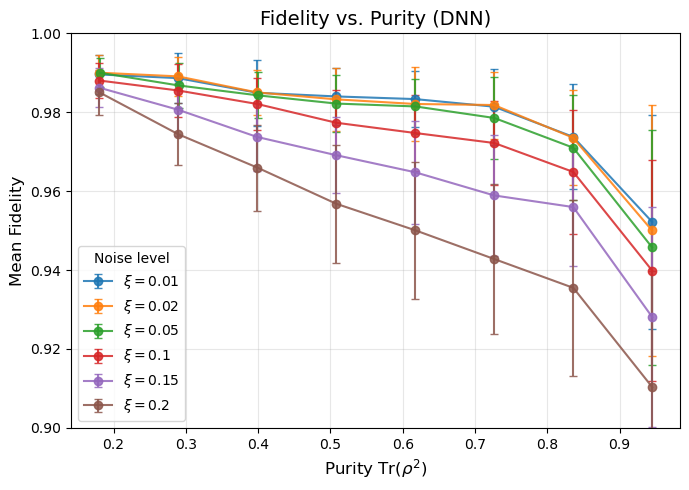

In [62]:
def plot_results(results: Dict[str, Dict[float, Tuple[np.ndarray, np.ndarray, np.ndarray]]]):
    """
    Plot each method's fidelity vs. purity as its own figure.
    Includes error bars for standard deviation within each purity bin.
    """
    for method, xi_dict in results.items():
        plt.figure(figsize=(7, 5))
        for xi, (purity_bins, mean_fids, std_fids) in xi_dict.items():
            plt.errorbar(
                purity_bins,
                mean_fids,
                yerr=std_fids,
                fmt='o-',
                capsize=3,
                label=f"$\\xi = {xi}$",
                alpha=0.85
            )
        plt.title(f"Fidelity vs. Purity ({method})", fontsize=14)
        plt.xlabel("Purity $\\mathrm{Tr}(\\rho^2)$", fontsize=12)
        plt.ylabel("Mean Fidelity", fontsize=12)
        plt.ylim(0.9, 1)
        plt.legend(title="Noise level")
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

plot_results(results_3q)

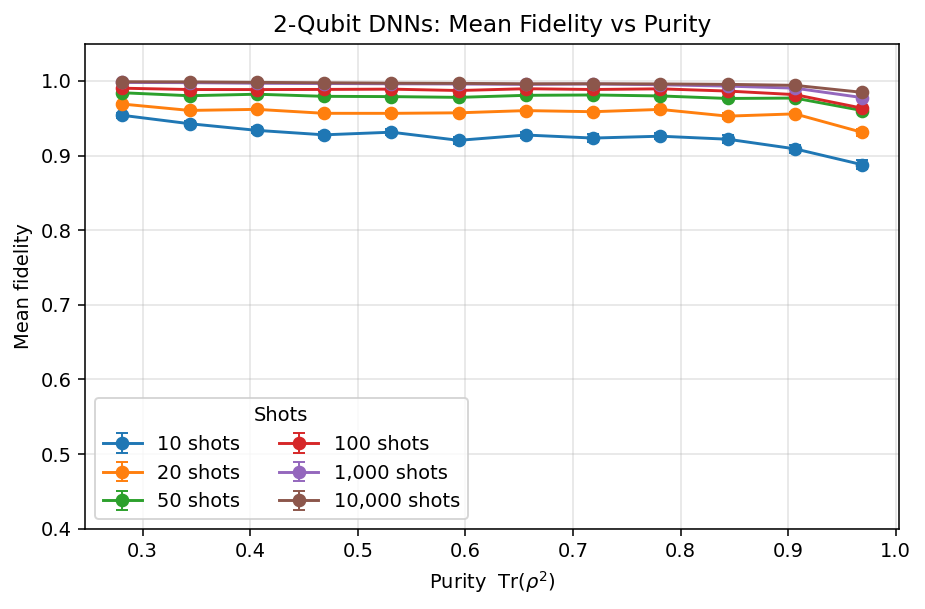

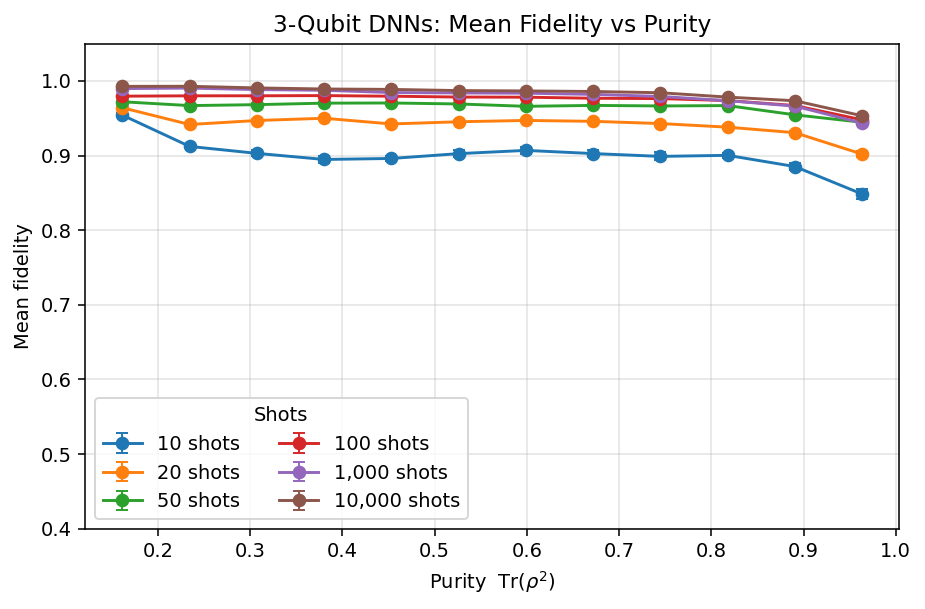

In [ ]:
def plot_mean_fidelity_by_purity_multi(
    dnns_by_shots: dict[int, "DNNQST"],
    datasets: dict[int, tuple[np.ndarray, np.ndarray]],
    n_bins: int = 12,
    purity_bins: list[tuple[float, float]] | None = None,
    batch_size: int = 256,
    max_eval_per_shots: int | None = None,
    rng_seed: int = 0,
    title: str | None = None,
    show_shaded_sem: bool = False,
    capsize: float = 3.0,
):
    any_Y = next(iter(datasets.values()))[1]
    d = any_Y.shape[1]

    rng = np.random.default_rng(rng_seed)
    bin_edges, bin_centers, bins_list = make_purity_bins(d, n_bins=n_bins, purity_bins=purity_bins)

    fig, ax = plt.subplots(figsize=(7.5, 4.5), dpi=140)
    results = {}

    for shots in sorted(datasets.keys()):
        if shots not in dnns_by_shots:
            continue

        dnn = dnns_by_shots[shots]
        X, Y = datasets[shots]
        N = Y.shape[0]
        if (max_eval_per_shots is not None) and (N > max_eval_per_shots):
            idx = rng.choice(N, size=max_eval_per_shots, replace=False)
            X, Y = X[idx], Y[idx]

        _, _, fids = dnn.evaluate_fidelity(X, Y, batch_size=batch_size)
        pur = purity_of_rho_batch(Y)

        mean, std, cnt = aggregate_by_purity_bins(pur, fids, bin_edges)

        sem = np.full_like(std, np.nan, dtype=float)
        valid = cnt > 1
        sem[valid] = std[valid] / np.sqrt(cnt[valid].astype(float))

        mask = ~np.isnan(mean)


        ax.errorbar(
            bin_centers[mask], mean[mask], yerr=sem[mask],
            fmt='-o', linewidth=1.5, elinewidth=1.0, capsize=capsize,
            label=f"{shots:,} shots"
        )

        if show_shaded_sem:
            lower = (mean - sem)
            upper = (mean + sem)
            ax.fill_between(bin_centers[mask], lower[mask], upper[mask], alpha=0.18)

        results[shots] = dict(
            bin_centers=bin_centers, bin_edges=bin_edges, bins=bins_list,
            mean=mean, std=std, sem=sem, count=cnt
        )

    ax.set_xlabel("Purity  Tr($\\rho^2$)")
    ax.set_ylabel("Mean fidelity")
    ax.set_ylim(0.4, 1.05)
    ax.grid(True, alpha=0.35)
    ax.legend(title="Shots", ncols=2 if len(datasets) > 5 else 1, frameon=True)
    ax.set_title(title or "DNN-QST (per-shots models): Mean fidelity vs purity")
    return fig, ax, results


fig, ax, res = plot_mean_fidelity_by_purity_multi(
    dnns_by_shots=dnns_2q,
    datasets=datasets_2q_test,
    n_bins=12,
    max_eval_per_shots=20000,
    title="2-Qubit DNNs: Mean Fidelity vs Purity"
)
plt.show()

fig, ax, res = plot_mean_fidelity_by_purity_multi(
    dnns_by_shots=dnns_3q,
    datasets=datasets_3q_test,
    n_bins=12,
    max_eval_per_shots=20000,
    title="3-Qubit DNNs: Mean Fidelity vs Purity"
)
plt.show()


In [45]:
# first train the models
def make_base_model(input_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(input_dim,)),
        tf.keras.layers.Dense(512, use_bias=False),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation("relu"),
        tf.keras.layers.Dropout(0.2),

        tf.keras.layers.Dense(512, use_bias=False),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation("relu"),
        tf.keras.layers.Dropout(0.2),

        tf.keras.layers.Dense(16)
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss="mse")
    return model

dnn_2q_0_01 = DNNQST(d=4, model=make_base_model(X_2p_01.shape[1]))
dnn_2q_0_02 = DNNQST(d=4, model=make_base_model(X_2p_02.shape[1]))
dnn_2q_0_05 = DNNQST(d=4, model=make_base_model(X_2p_05.shape[1]))
dnn_2q_0_10 = DNNQST(d=4, model=make_base_model(X_2p_10.shape[1]))
dnn_2q_0_15 = DNNQST(d=4, model=make_base_model(X_2p_15.shape[1]))
dnn_2q_0_20 = DNNQST(d=4, model=make_base_model(X_2p_20.shape[1]))



dnn_2q_0_01.fit(X_2p_01, y_2p_01)
dnn_2q_0_02.fit(X_2p_02, y_2p_02)
dnn_2q_0_05.fit(X_2p_05, y_2p_05)
dnn_2q_0_10.fit(X_2p_10, y_2p_10)
dnn_2q_0_15.fit(X_2p_15, y_2p_15)
dnn_2q_0_20.fit(X_2p_20, y_2p_20)


Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.1354 - val_loss: 0.0069
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0036 - val_loss: 0.0065
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0029 - val_loss: 0.0052
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0025 - val_loss: 0.0052
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0022 - val_loss: 0.0051
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0020 - val_loss: 0.0048
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0019 - val_loss: 0.0053
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0019 - val_loss: 0.0048
Epoch 9/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0018 - val_loss: 0.0048
Epoch 10/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0018 - val_loss: 0.0043
Epoch 11/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0017 - val_loss: 0.0044
Epoch 12/20
1407/1407 ━━━━━━━━

In [58]:


dnn_3q_0_01 = DNNQST(d=4, model=make_base_model_3q(X_3p_01.shape[1]))
dnn_3q_0_02 = DNNQST(d=4, model=make_base_model_3q(X_3p_02.shape[1]))
dnn_3q_0_05 = DNNQST(d=4, model=make_base_model_3q(X_3p_05.shape[1]))
dnn_3q_0_10 = DNNQST(d=4, model=make_base_model_3q(X_3p_10.shape[1]))
dnn_3q_0_15 = DNNQST(d=4, model=make_base_model_3q(X_3p_15.shape[1]))
dnn_3q_0_20 = DNNQST(d=4, model=make_base_model_3q(X_3p_20.shape[1]))



dnn_3q_0_01.fit(X_3p_01, y_3p_01)
dnn_3q_0_02.fit(X_3p_02, y_3p_02)
dnn_3q_0_05.fit(X_3p_05, y_3p_05)
dnn_3q_0_10.fit(X_3p_10, y_3p_10)
dnn_3q_0_15.fit(X_3p_15, y_3p_15)
dnn_3q_0_20.fit(X_3p_20, y_3p_20)

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.1182 - val_loss: 0.0081
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0050 - val_loss: 0.0046
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0033 - val_loss: 0.0031
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0024 - val_loss: 0.0027
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0017 - val_loss: 0.0019
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0014 - val_loss: 0.0020
Epoch 9/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 10/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 11/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 12/20
1407/1407 ━━━━━━━

In [46]:
data_test_2p_0_01 = np.load('../src/qst/datasets/test_purities/2q_noise_purity_0.01.npz', allow_pickle=True)
data_test_2p_0_02 = np.load('../src/qst/datasets/test_purities/2q_noise_purity_0.02.npz', allow_pickle=True)
data_test_2p_0_05 = np.load('../src/qst/datasets/test_purities/2q_noise_purity_0.05.npz', allow_pickle=True)
data_test_2p_0_10 = np.load('../src/qst/datasets/test_purities/2q_noise_purity_0.10.npz', allow_pickle=True)
data_test_2p_0_15 = np.load('../src/qst/datasets/test_purities/2q_noise_purity_0.15.npz', allow_pickle=True)
data_test_2p_0_20 = np.load('../src/qst/datasets/test_purities/2q_noise_purity_0.20.npz', allow_pickle=True)

X_test_2p_0_01 = data_test_2p_0_01['counts']; y_test_2p_0_01 = data_test_2p_0_01['states']
X_test_2p_0_02 = data_test_2p_0_02['counts']; y_test_2p_0_02 = data_test_2p_0_02['states']
X_test_2p_0_05 = data_test_2p_0_05['counts']; y_test_2p_0_05 = data_test_2p_0_05['states']
X_test_2p_0_10 = data_test_2p_0_10['counts']; y_test_2p_0_10 = data_test_2p_0_10['states']
X_test_2p_0_15 = data_test_2p_0_15['counts']; y_test_2p_0_15 = data_test_2p_0_15['states']
X_test_2p_0_20 = data_test_2p_0_20['counts']; y_test_2p_0_20 = data_test_2p_0_20['states']

data_test_3p_0_01 = np.load('../src/qst/datasets/test_purities/3q_noise_purity_0.01.npz', allow_pickle=True)
data_test_3p_0_02 = np.load('../src/qst/datasets/test_purities/3q_noise_purity_0.02.npz', allow_pickle=True)
data_test_3p_0_05 = np.load('../src/qst/datasets/test_purities/3q_noise_purity_0.05.npz', allow_pickle=True)
data_test_3p_0_10 = np.load('../src/qst/datasets/test_purities/3q_noise_purity_0.10.npz', allow_pickle=True)
data_test_3p_0_15 = np.load('../src/qst/datasets/test_purities/3q_noise_purity_0.15.npz', allow_pickle=True)
data_test_3p_0_20 = np.load('../src/qst/datasets/test_purities/3q_noise_purity_0.20.npz', allow_pickle=True)

X_test_3p_0_01 = data_test_3p_0_01['counts']; y_test_3p_0_01 = data_test_3p_0_01['states']
X_test_3p_0_02 = data_test_3p_0_02['counts']; y_test_3p_0_02 = data_test_3p_0_02['states']
X_test_3p_0_05 = data_test_3p_0_05['counts']; y_test_3p_0_05 = data_test_3p_0_05['states']
X_test_3p_0_10 = data_test_3p_0_10['counts']; y_test_3p_0_10 = data_test_3p_0_10['states']
X_test_3p_0_15 = data_test_3p_0_15['counts']; y_test_3p_0_15 = data_test_3p_0_15['states']
X_test_3p_0_20 = data_test_3p_0_20['counts']; y_test_3p_0_20 = data_test_3p_0_20['states']

In [ ]:




def purity_from_rho_batch(rhos: np.ndarray) -> np.ndarray:
    """
    rhos: (N, d, d) complex or real density matrices
    returns purities: (N,)
    """
    rho2 = np.matmul(rhos, rhos)
    pur = np.einsum('nii->n', rho2).real
    return pur

def make_purity_bins(d: int, n_bins: int = 12, purity_bins: Optional[list[tuple[float, float]]] = None):
    """
    If purity_bins is given, it should be a list of (low, high) tuples.
    Otherwise, make equal-width bins from 1/d to 1.
    """
    if purity_bins is not None:
        edges = np.array([b[0] for b in purity_bins] + [purity_bins[-1][1]], dtype=float)
    else:
        low, high = 1.0 / d, 1.0
        edges = np.linspace(low, high, n_bins + 1)
    centers = 0.5 * (edges[:-1] + edges[1:])
    return edges, centers


def plot_dnn_fidelity_vs_purity_multi_noise(
    dnns_by_xi: Dict[float, "DNNQST"],
    datasets_by_xi: Dict[float, Tuple[np.ndarray, np.ndarray]],
    *,
    d: int,
    n_bins: int = 12,
    purity_bins: Optional[list[tuple[float, float]]] = None,
    batch_size: int = 256,
    max_eval_per_xi: Optional[int] = None,
    rng_seed: int = 0,
    err_kind: str = "std",
    title: Optional[str] = None,
):
    rng = np.random.default_rng(rng_seed)
    bin_edges, bin_centers = make_purity_bins(d, n_bins=n_bins, purity_bins=purity_bins)

    results = {}
    xis_sorted = sorted([xi for xi in dnns_by_xi.keys() if xi in datasets_by_xi])

    plt.figure(figsize=(7, 5))
    for xi in xis_sorted:
        dnn = dnns_by_xi[xi]
        X, Y_true = datasets_by_xi[xi]

        N = X.shape[0]
        if max_eval_per_xi is not None and max_eval_per_xi < N:
            idx = rng.choice(N, size=max_eval_per_xi, replace=False)
            X, Y_true = X[idx], Y_true[idx]

        # Evaluate fidelity
        _, _, fids = dnn.evaluate_fidelity(X, Y_true, batch_size=batch_size)
        purities = purity_from_rho_batch(Y_true)

        # Bin by purity
        mean_fids, std_fids = [], []
        for b0, b1 in zip(bin_edges[:-1], bin_edges[1:]):
            mask = (purities >= b0) & (purities < b1)
            vals = fids[mask]
            if len(vals) == 0:
                mean_fids.append(np.nan)
                std_fids.append(np.nan)
            else:
                mean_fids.append(np.mean(vals))
                std_fids.append(np.std(vals, ddof=0))

        mean_fids = np.array(mean_fids)
        std_fids = np.array(std_fids)

        plt.errorbar(
            bin_centers,
            mean_fids,
            yerr=std_fids,
            fmt='o-',
            capsize=3,
            label=f"$\\xi = {xi}$",
            alpha=0.85
        )

        results[xi] = (bin_centers, mean_fids, std_fids)

    plt.title(title or "DNN — Fidelity vs. Purity", fontsize=14)
    plt.xlabel("Purity $\\mathrm{Tr}(\\rho^2)$", fontsize=12)
    plt.ylabel("Mean Fidelity", fontsize=12)
    plt.ylim(0.9, 1.0)
    plt.legend(title="Noise level")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    return results

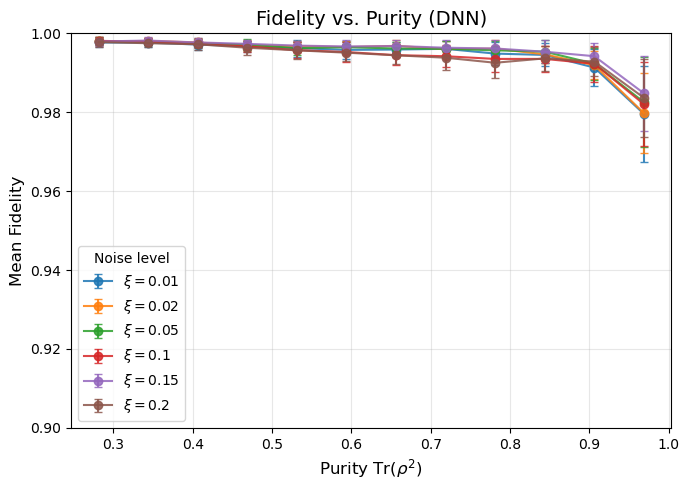

In [ ]:
dnns_by_xi = {
    0.01: dnn_2q_0_01,
    0.02: dnn_2q_0_02,
    0.05: dnn_2q_0_05,
    0.10: dnn_2q_0_10,
    0.15: dnn_2q_0_15,
    0.20: dnn_2q_0_20,
}

datasets_by_xi = {
    0.01: (X_test_2p_0_01, y_test_2p_0_01),
    0.02: (X_test_2p_0_02, y_test_2p_0_02),
    0.05: (X_test_2p_0_05, y_test_2p_0_05),
    0.10: (X_test_2p_0_10, y_test_2p_0_10),
    0.15: (X_test_2p_0_15, y_test_2p_0_15),
    0.20: (X_test_2p_0_20, y_test_2p_0_20),
}


results_dnn = plot_dnn_fidelity_vs_purity_multi_noise(
    dnns_by_xi=dnns_by_xi,
    datasets_by_xi=datasets_by_xi,
    d=4,
    n_bins=12,
    max_eval_per_xi=4000,
    title="Fidelity vs. Purity (DNN)"
)


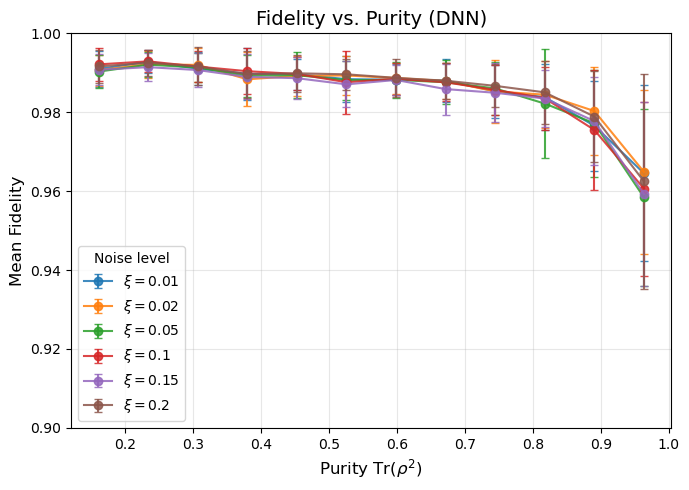

In [66]:
dnn_3q_0_01.d = 8
dnn_3q_0_02.d = 8
dnn_3q_0_05.d = 8
dnn_3q_0_10.d = 8
dnn_3q_0_15.d = 8
dnn_3q_0_20.d = 8

dnns_by_xi_3q = {
    0.01: dnn_3q_0_01,
    0.02: dnn_3q_0_02,
    0.05: dnn_3q_0_05,
    0.10: dnn_3q_0_10,
    0.15: dnn_3q_0_15,
    0.20: dnn_3q_0_20,
}

datasets_by_xi_3q = {
    0.01: (X_test_3p_0_01, y_test_3p_0_01),
    0.02: (X_test_3p_0_02, y_test_3p_0_02),
    0.05: (X_test_3p_0_05, y_test_3p_0_05),
    0.10: (X_test_3p_0_10, y_test_3p_0_10),
    0.15: (X_test_3p_0_15, y_test_3p_0_15),
    0.20: (X_test_3p_0_20, y_test_3p_0_20),
}


results_dnn_3q = plot_dnn_fidelity_vs_purity_multi_noise(
    dnns_by_xi=dnns_by_xi_3q,
    datasets_by_xi=datasets_by_xi_3q,
    d=8,
    n_bins=12,
    max_eval_per_xi=4000,
    title="Fidelity vs. Purity (DNN)"
)


In [ ]:
def _tqdm(x, **kwargs): return x

def _eigvals_psd(rho: np.ndarray) -> np.ndarray:
    rhoH = 0.5 * (rho + rho.conj().T)
    w = np.linalg.eigvalsh(rhoH)
    w = np.clip(np.real(w), 0.0, None)
    s = w.sum()
    if s > 0:
        w = w / s
    else:
        w = np.ones_like(w) / w.size
    return w

def dnn_eigvals_by_purity(
    datasets: dict[int, tuple[np.ndarray, np.ndarray]],
    dnn_model: DNNQST,
    shots: int | None = None,
    n_samples_per_bin: int = 60,
    n_purity_bins: int = 3,
    rng_seed: int = 0,
    purity_edges: np.ndarray | None = None,
):

    rng = np.random.default_rng(rng_seed)

    # Choose shots bucket
    if shots is None:
        shots = max(datasets.keys())
    X, Y = datasets[shots]
    N = len(X)
    d = Y.shape[1]
    pmin_valid, pmax_valid = 1.0 / d, 1.0

    # true purities
    def _purity(rho): return float(np.real(np.trace(rho @ rho)))
    Ps = np.array([_purity(Y[i]) for i in range(N)], dtype=float)

    # purity bin edges
    if purity_edges is None:
        Pmin_obs = max(Ps.min(), pmin_valid)
        Pmax_obs = min(Ps.max(), pmax_valid)
        edges = np.linspace(Pmin_obs, Pmax_obs, n_purity_bins + 1)
    else:
        edges = np.asarray(purity_edges, dtype=float)
        assert np.all(np.diff(edges) > 0), "purity_edges must be strictly increasing"

    centers = 0.5 * (edges[:-1] + edges[1:])
    bin_idx = np.digitize(Ps, edges, right=False) - 1
    bin_idx = np.clip(bin_idx, 0, len(edges) - 2)

    bin_labels = [
        f"[{edges[j]:.3f}, {edges[j+1]:.3f})" if j < len(edges)-2 else f"[{edges[j]:.3f}, {edges[j+1]:.3f}]"
        for j in range(len(edges)-1)
    ]

    eigvals_by_bin: list[list[float]] = [[] for _ in range(len(edges)-1)]
    n_states_used = np.zeros(len(edges)-1, dtype=int)

    # For each bin, randomly pick up to n_samples_per_bin states and predict via DNN
    for b in range(len(edges) - 1):
        idxs = np.flatnonzero(bin_idx == b)
        if idxs.size == 0:
            continue
        take = min(n_samples_per_bin, idxs.size)
        pick = rng.choice(idxs, size=take, replace=False)
        n_states_used[b] = take

        # predict rhos for selected samples
        X_sel = X[pick]
        rhos_pred = dnn_model.predict_rho(X_sel)

        for rho_hat in rhos_pred:
            w = _eigvals_psd(rho_hat)
            eigvals_by_bin[b].extend(w.tolist())

    return {
        "shots": shots,
        "d": d,
        "purity_edges": edges,
        "purity_centers": centers,
        "bin_labels": bin_labels,
        "eigvals_by_bin": eigvals_by_bin,
        "n_states_used_per_bin": n_states_used,
    }
def plot_dnn_eigval_histograms(
    res: dict,
    n_bins_hist: int = 25,
    sharey: bool = True,
    title: str | None = None,
):
    """
    Plot histograms of MLE eigenvalues per purity bin (subplots across bins).
    """
    edges = res["purity_edges"]
    labels = res["bin_labels"]
    eigvals_by_bin = res["eigvals_by_bin"]
    shots = res["shots"]

    nb = len(labels)
    fig, axes = plt.subplots(1, nb, figsize=(4.6 * nb, 3.8), sharey=sharey)
    if nb == 1:
        axes = [axes]

    for ax, lab, vals in zip(axes, labels, eigvals_by_bin):
        vals = np.asarray(vals, dtype=float)
        if vals.size == 0:
            ax.set_visible(False)
            continue
        ax.hist(vals, bins=n_bins_hist, density=True, alpha=0.9)
        ax.set_xlabel("Eigenvalue")
        ax.set_title(f"Purity {lab}\n(n eigvals = {vals.size})")
        ax.grid(True, alpha=0.3)

    axes[0].set_ylabel("Density")
    if title is None:
        title = f"MLE eigenvalue histograms by purity bands (shots={shots:,})"
    fig.suptitle(title)
    plt.ylim(0, 25)
    fig.tight_layout()
    plt.show()

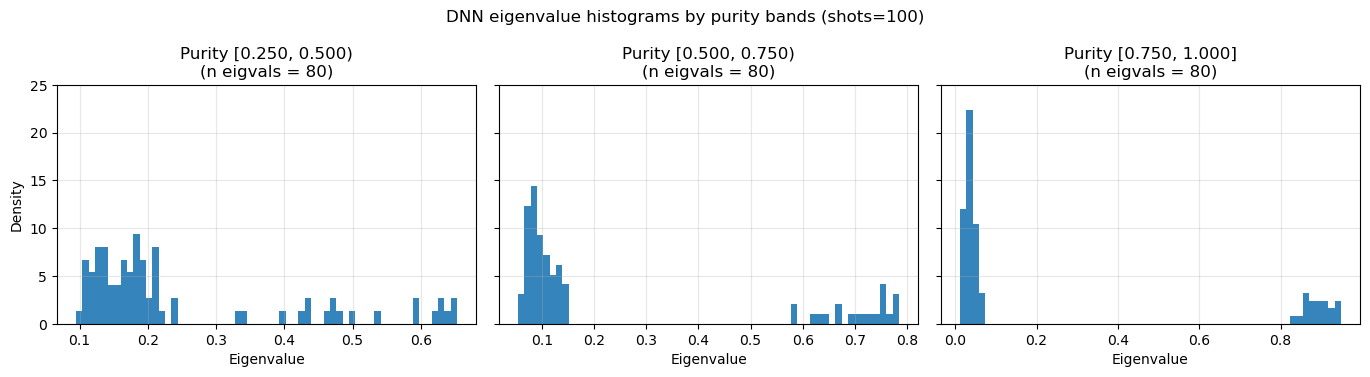

In [70]:
res_dnn_2q = dnn_eigvals_by_purity(
    datasets=datasets_2q,
    dnn_model=dnn_2q_100,
    shots=100,
    n_samples_per_bin=20,
    n_purity_bins=3,
    rng_seed=123
)

plot_dnn_eigval_histograms(
    res=res_dnn_2q,
    n_bins_hist=60,
    title="DNN eigenvalue histograms by purity bands (shots=100)"
)


In [ ]:
dnn_2q_1000